In [37]:
# importing the libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.basemap import Basemap

%matplotlib inline

In [32]:
driftl_df = pd.read_csv(r"C:\Users\adars\Downloads\drifting_longlines.csv")
driftl_df.head(10)

,mmsi,timestamp,distance_from_shore,distance_from_port,speed,course,lat,lon,is_fishing,source
0,1.263956e+13,1.327137e+09,232994.281250,311748.65625,8.2,230.500000,14.865583,-26.853662,-1.0,dalhousie_longliner
1,1.263956e+13,1.327137e+09,233994.265625,312410.34375,7.3,238.399994,14.863870,-26.856800,-1.0,dalhousie_longliner
2,1.263956e+13,1.327137e+09,233994.265625,312410.34375,6.8,238.899994,14.861551,-26.860649,-1.0,dalhousie_longliner
3,1.263956e+13,1.327143e+09,233994.265625,315417.37500,6.9,251.800003,14.822686,-26.865898,-1.0,dalhousie_longliner
4,1.263956e+13,1.327143e+09,233996.390625,316172.56250,6.1,231.100006,14.821825,-26.867579,-1.0,dalhousie_longliner
5,1.263956e+13,1.327143e+09,233996.390625,316172.56250,6.9,242.699997,14.820652,-26.869459,-1.0,dalhousie_longliner
6,1.263956e+13,1.327146e+09,246124.015625,329350.37500,7.5,225.399994,14.762110,-26.970394,-1.0,dalhousie_longliner
7,1.263956e+13,1.327150e+09,259487.375000,343997.37500,8.9,237.199997,14.694498,-27.085396,-1.0,dalhousie_longliner
8,1.263956e+13,1.327150e+09,259487.375000,343997.37500,8.5,246.800003,14.693447,-27.087166,-1.0,dalhousie_longliner
9,1.263956e+13,1.327156e+09,286567.562500,371996.25000,9.2,223.699997,14.564687,-27.320160,-1.0,dalhousie_longliner


In [8]:
# Statistical data analysis


driftl_df.describe()

,mmsi,timestamp,distance_from_shore,distance_from_port,speed,course,lat,lon,is_fishing
count,1.396873e+07,1.396873e+07,1.396873e+07,1.396873e+07,1.396863e+07,1.396863e+07,1.396873e+07,1.396873e+07,1.396873e+07
mean,1.293850e+14,1.434290e+09,5.845311e+05,7.897505e+05,5.464779e+00,1.814876e+02,-8.997629e+00,3.758693e+00,-9.743015e-01
std,7.887357e+13,3.984275e+07,5.420068e+05,6.915438e+05,4.043567e+00,1.050503e+02,2.439311e+01,1.095971e+02,2.119947e-01
min,5.601266e+12,1.325376e+09,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-7.519017e+01,-1.800000e+02,-1.000000e+00
25%,6.260384e+13,1.410706e+09,1.019092e+05,2.130206e+05,2.100000e+00,9.070000e+01,-2.601550e+01,-8.808668e+01,-1.000000e+00
50%,1.184859e+14,1.447302e+09,4.576393e+05,6.375249e+05,5.500000e+00,1.811000e+02,-1.497954e+01,-1.716495e+00,-1.000000e+00
75%,1.980758e+14,1.466506e+09,9.603664e+05,1.210432e+06,8.500000e+00,2.711000e+02,4.485790e+00,1.009811e+02,-1.000000e+00
max,2.812058e+14,1.480032e+09,4.430996e+06,7.181037e+06,1.023000e+02,5.110000e+02,8.333266e+01,1.799938e+02,1.000000e+00


In [10]:
driftl_df.shape

(13968727, 10)

In [11]:
#checking for na values

driftl_df.isna().sum()


mmsi                    0
timestamp               0
distance_from_shore     0
distance_from_port      0
speed                  98
course                 98
lat                     0
lon                     0
is_fishing              0
source                  0
dtype: int64

In [12]:
#check for duplicate rows
duplicates = driftl_df.duplicated()
driftl_df[duplicates].head()


,mmsi,timestamp,distance_from_shore,distance_from_port,speed,course,lat,lon,is_fishing,source


In [13]:
#Droping duplicate rows
driftl_df = driftl_df.drop_duplicates()
driftl_df.shape


(13968727, 10)

In [14]:
#Number of unique vessels under observation
driftl_df['mmsi'].unique().shape


(110,)

In [15]:
driftl_df['mmsi'].value_counts()

3.186568e+13    577528
1.184859e+14    450578
6.260384e+13    411087
1.576064e+14    367776
5.641469e+13    353203
                 ...  
1.680158e+14     13289
1.263956e+13     11846
2.774583e+14     11273
3.222535e+13     10522
2.088869e+14      9749
Name: mmsi, Length: 110, dtype: int64

<AxesSubplot:xlabel='mmsi', ylabel='count'>

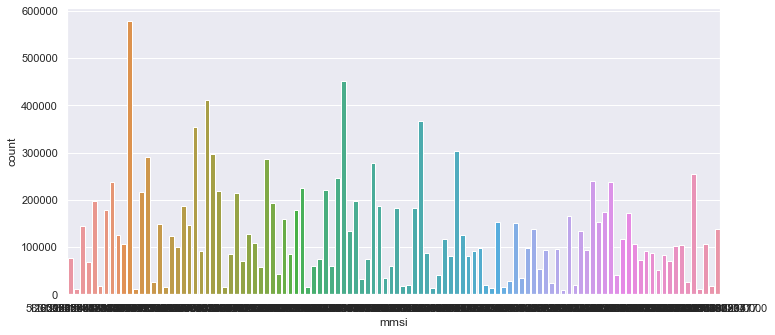

In [36]:
sns.set(rc={'figure.figsize':(11.7,5.27)})
sns.countplot(x=driftl_df['mmsi'])


In [17]:
#Coverting Unix time to readable date time format
    
date_time = pd.to_datetime(driftl_df['timestamp'],unit='s')
print(date_time)


0          2012-01-21 09:01:44
1          2012-01-21 09:03:25
2          2012-01-21 09:05:34
3          2012-01-21 10:54:41
4          2012-01-21 10:55:41
                   ...        
13968722   2016-11-24 23:07:40
13968723   2016-11-24 23:10:57
13968724   2016-11-24 23:11:00
13968725   2016-11-24 23:51:30
13968726   2016-11-24 23:59:10
Name: timestamp, Length: 13968727, dtype: datetime64[ns]


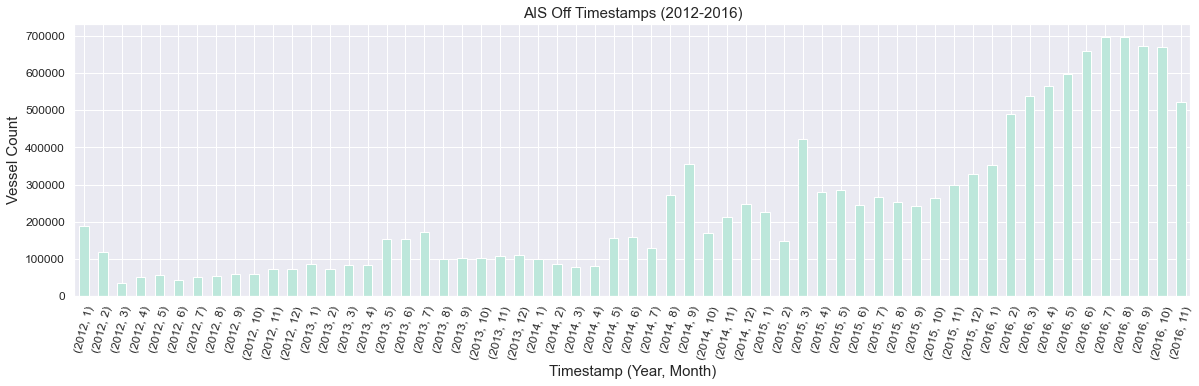

In [19]:
# Visualize the distribution of AIS off timestamdriftl across 2-year period

plt.figure(figsize=(20,5))
# Group dataframe by month and year

timing = date_time.groupby([date_time.dt.year,
                                              date_time.dt.month])
ax = timing.count().plot(kind="bar", rot=75, cmap='icefire')
ax.set_xlabel("Timestamp (Year, Month)", fontsize=15)
ax.set_ylabel("Vessel Count", fontsize=15)
ax.set_title("AIS Off Timestamps (2012-2016)", fontsize=15)
ax.tick_params(labelsize=12);


In [20]:
# Time range of the dataset

pd.to_datetime(driftl_df['timestamp'],unit='s').describe()

#Start date : 2012-01-03 21:06:29
#End date : 2016-11-24 23:58:30


C:\Users\adars\AppData\Local\Temp/ipykernel_12948/512409276.py:3: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  pd.to_datetime(driftl_df['timestamp'],unit='s').describe()


count                13968727
unique               11172088
top       2013-06-29 03:08:06
freq                       24
first     2012-01-01 00:00:42
last      2016-11-24 23:59:59
Name: timestamp, dtype: object

In [21]:
#Remove Vessels at port

#Vessels at shore
at_shore = driftl_df.loc[(driftl_df['distance_from_shore'] == 0.00)]
print(f"{len(at_shore)} vessels (45% of observations) have timestamdriftl at shore.")


1424781 vessels (45% of observations) have timestamdriftl at shore.


In [22]:
#Vessels at port
at_port = driftl_df.loc[(driftl_df['distance_from_port'] == 0.00)]
print(f"{len(at_port)} vessels have timestamdriftl at port.")

print(at_port)
# drop observations where vessel is at port (i.e. distance is 0 m)


192888 vessels have timestamdriftl at port.
                  mmsi     timestamp  distance_from_shore  distance_from_port  \
941       1.263956e+13  1.357954e+09                  0.0                 0.0   
942       1.263956e+13  1.357955e+09                  0.0                 0.0   
943       1.263956e+13  1.357956e+09                  0.0                 0.0   
944       1.263956e+13  1.357957e+09                  0.0                 0.0   
945       1.263956e+13  1.357958e+09                  0.0                 0.0   
...                ...           ...                  ...                 ...   
13965438  2.812058e+14  1.478511e+09                  0.0                 0.0   
13965439  2.812058e+14  1.478511e+09                  0.0                 0.0   
13965440  2.812058e+14  1.478512e+09                  0.0                 0.0   
13965441  2.812058e+14  1.478512e+09                  0.0                 0.0   
13965442  2.812058e+14  1.478512e+09                  0.0        

In [23]:
#Droping vessels at port
driftl_df.drop(at_port['distance_from_port'] ,axis=0, inplace=True)


In [24]:
driftl_df.loc[driftl_df['is_fishing'] > 0, 'is_fishing'] = 1

In [25]:
driftl_df['is_fishing'].value_counts()

-1.0    13748985
 1.0      140167
 0.0       79574
Name: is_fishing, dtype: int64

C:\Users\adars\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='is_fishing', ylabel='count'>

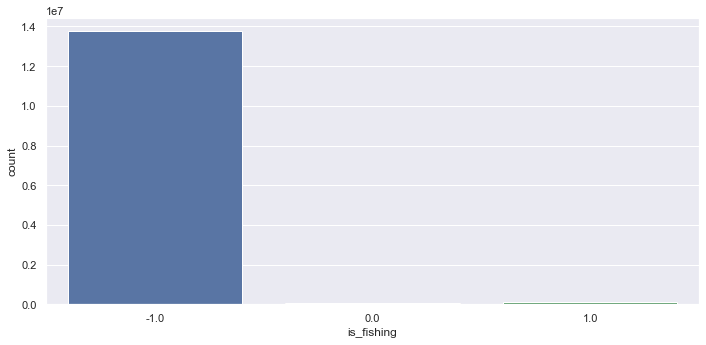

In [26]:
sns.countplot(driftl_df['is_fishing'])

C:\Users\adars\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='mmsi', ylabel='count'>

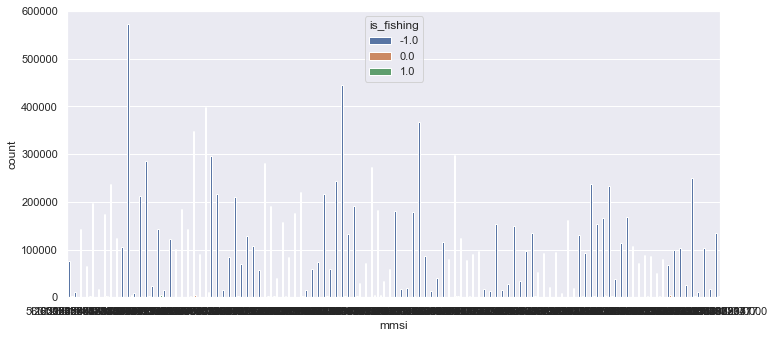

In [30]:
sns.countplot(driftl_df['mmsi'], hue = driftl_df['is_fishing'])

In [28]:
print(driftl_df['mmsi'].unique())

[1.26395608e+13 5.13944393e+13 7.71824243e+13 1.03576447e+14
 1.18485905e+14 1.68015789e+14 2.15151145e+14 2.57110405e+14
 2.81060478e+14 2.37707833e+13 8.12639636e+13 5.60126615e+12
 2.35931302e+13 3.18656799e+13 5.64146857e+13 6.06288701e+13
 6.87765674e+13 8.05570443e+13 9.18170200e+13 1.00043174e+14
 1.22096468e+14 1.32854487e+14 1.57606377e+14 1.82087890e+14
 1.88687365e+14 1.96934368e+14 2.07493565e+14 2.60992597e+14
 2.66462075e+14 2.77458321e+14 1.65080543e+13 2.00018345e+13
 2.12327089e+13 2.34067461e+13 2.79323265e+13 3.03738041e+13
 3.22253464e+13 3.32660862e+13 3.64278025e+13 3.79089960e+13
 4.09766373e+13 4.19417865e+13 4.84550396e+13 4.91602893e+13
 4.95349948e+13 6.26038442e+13 7.20610407e+13 7.57043409e+13
 7.78329270e+13 8.36119531e+13 8.49487995e+13 8.79192769e+13
 8.80264650e+13 8.91103065e+13 9.50627185e+13 9.62143834e+13
 1.00771711e+14 1.02111575e+14 1.08694286e+14 1.09864466e+14
 1.17813837e+14 1.19914759e+14 1.32058711e+14 1.34198565e+14
 1.34393119e+14 1.387050

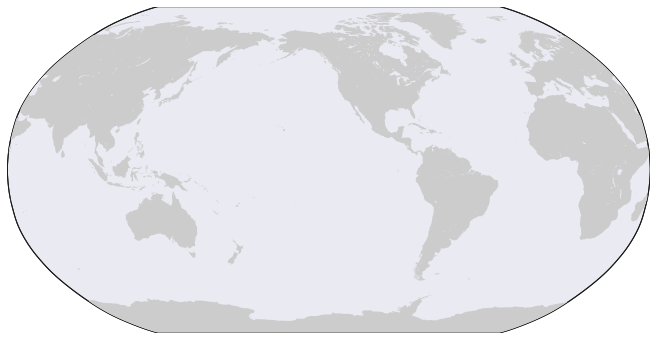

In [29]:
f = driftl_df.loc[(driftl_df['mmsi'] == 112940878780541.0)]
plt.figure(figsize=(12,6))
lons, lats = f['lon'].tolist(), f['lat'].tolist()
m = Basemap(projection='robin', resolution = 'l', area_thresh = 1000.0, lat_0=0, lon_0=-130)
m.bluemarble()
m.drawmapboundary()
m.fillcontinents()
x, y = m(lons, lats)
m.scatter(x, y, marker='.',color='red')
